# **1) Loading dataset and Overview**

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang",
    "oldpeak","slope","ca","thal","target"
]

df = pd.read_csv(url, names=columns)

In [2]:
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [3]:
print(df.tail())

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
298    2.0  0.0  7.0       1  
299    2.0  2.0  7.0       2  
300    2.0  1.0  7.0       3  
301    2.0  1.0  3.0       1  
302    1.0    ?  3.0       0  


In [4]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


# **2) Data Preprocessing & Cleaning**

**Handle missing values**

In [6]:
# Replace "?" with NaN first
import numpy as np
df.replace("?", np.nan, inplace=True)

# Convert numeric columns properly
df = df.apply(pd.to_numeric, errors="ignore")

# Cast columns back to int where appropriate
int_cols = ["age", "sex", "cp", "trestbps", "chol",
            "fbs", "restecg", "thalach", "exang",
            "slope", "ca", "thal", "target"]

for col in int_cols:
    # Only if no NaN left
    if df[col].isnull().sum() == 0:
        df[col] = df[col].astype(int)

print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object


/tmp/ipython-input-2538460485.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


In [7]:
# Fill 'ca' (categorical-like) with its most frequent value (mode)
df["ca"] = df["ca"].fillna(df["ca"].mode()[0])

# Fill 'thal' (numeric) with its median
df["thal"] = df["thal"].fillna(df["thal"].median())

In [8]:
print(df.isnull().sum())
print(df.dtypes)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object


In [9]:
df["ca"] = df["ca"].astype(int)
df["thal"] = df["thal"].astype(int)

**Data Encoding (Categorical Variables → Numeric)**

In [10]:
df = pd.get_dummies(df, columns=["cp","restecg","slope","thal"], drop_first=True)

**Standardize numerical features [StandardScaler]**

In [11]:
from sklearn.preprocessing import StandardScaler

num_cols = ["age","trestbps","chol","thalach","oldpeak"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

**Exploratory Data Analysis (EDA) - Visualiztions**

*Histograms for distribution:*

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

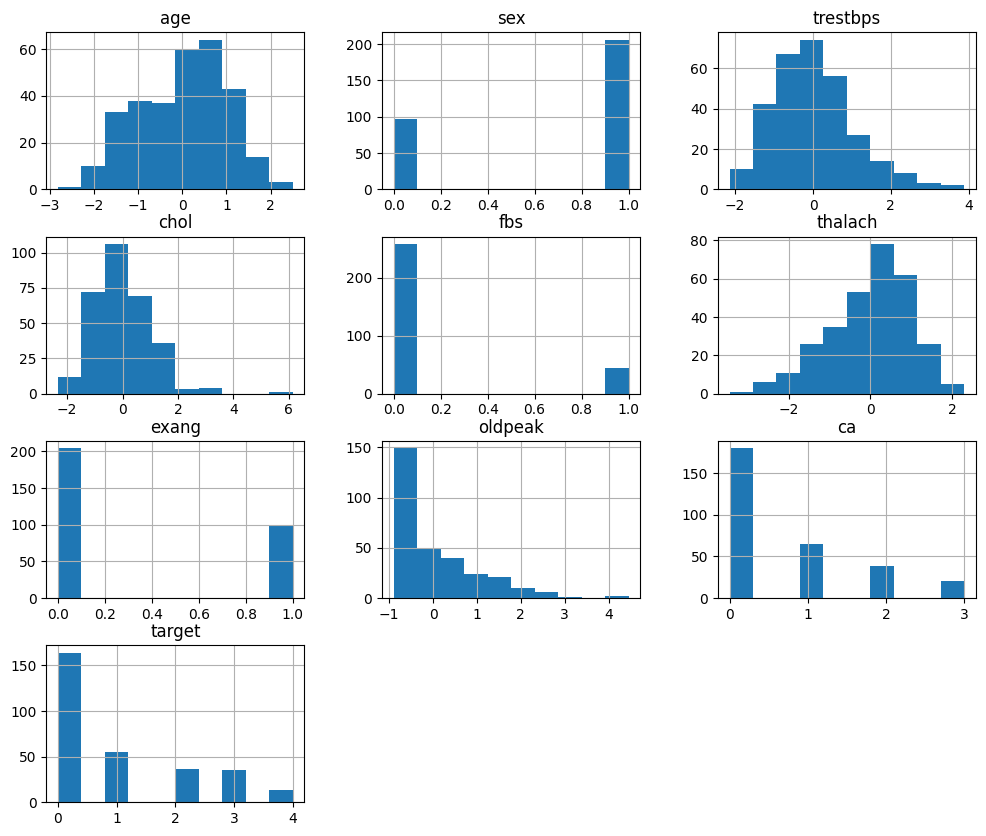

In [12]:
df.hist(figsize=(12,10))

*Correlation heatmap:*

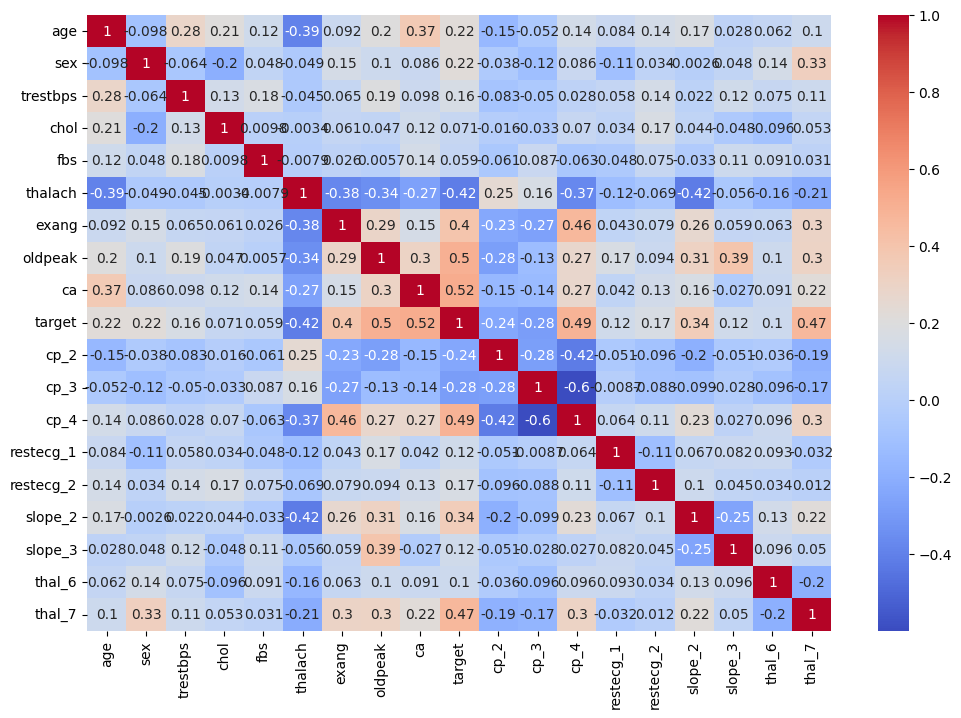

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

*Boxplots for outliers:*

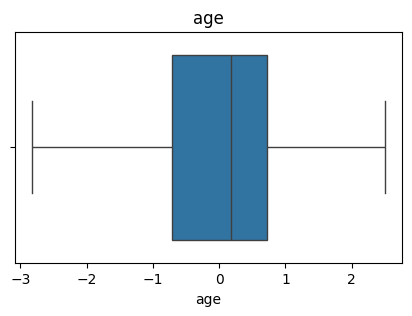

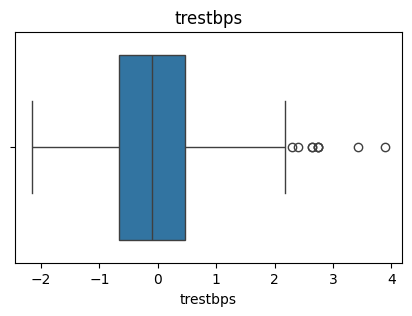

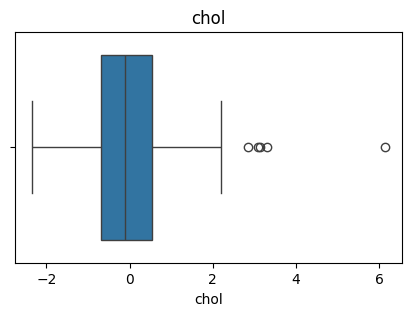

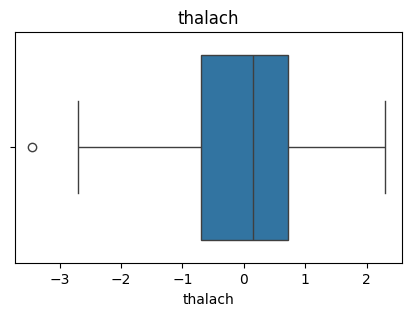

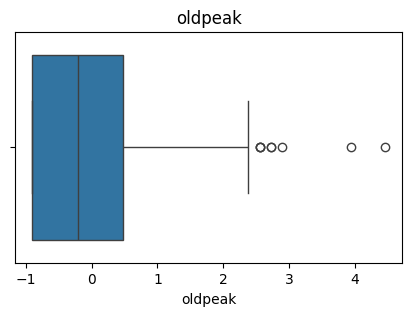

In [14]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [15]:
# df.to_csv("heart_disease_cleaned.csv", index=False)

# from google.colab import files
# files.download("heart_disease_cleaned.csv")

# **3) Dimensionality Reduction - PCA (Principal Component Analysis)**

**Apply PCA**

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

**Determine optimal number of components**

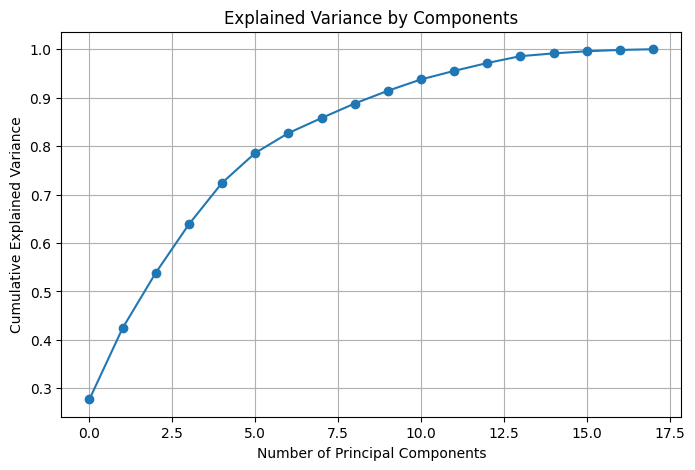

In [16]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid(True)
plt.show()

**Re-run PCA with optimal components**

the optimal components on the graph when it starts *stagnation*. Here it ranges from **8 - 10**.

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (303, 18)
Reduced shape: (303, 10)


**Visualize PCA scatter plot**

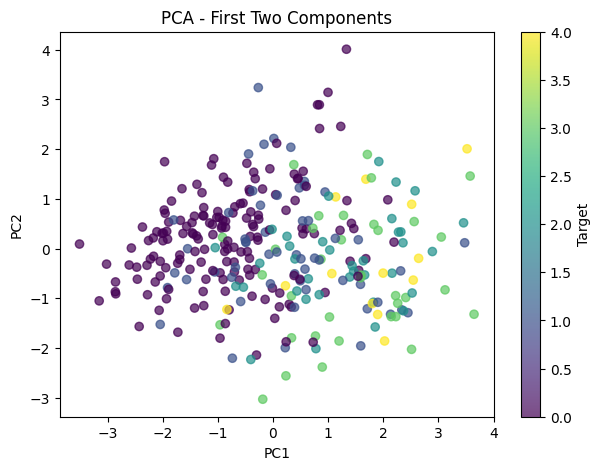

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components")
plt.colorbar(label="Target")
plt.show()

**Save PCA-transformed dataset**

In [19]:
# convert back to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca_df["target"] = y.values

# save
X_pca_df.to_csv("heart_disease_pca.csv", index=False)

# **4) Feature Selection**

**Feature Importance (Random Forest)**

Using tree-based models to rank features

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

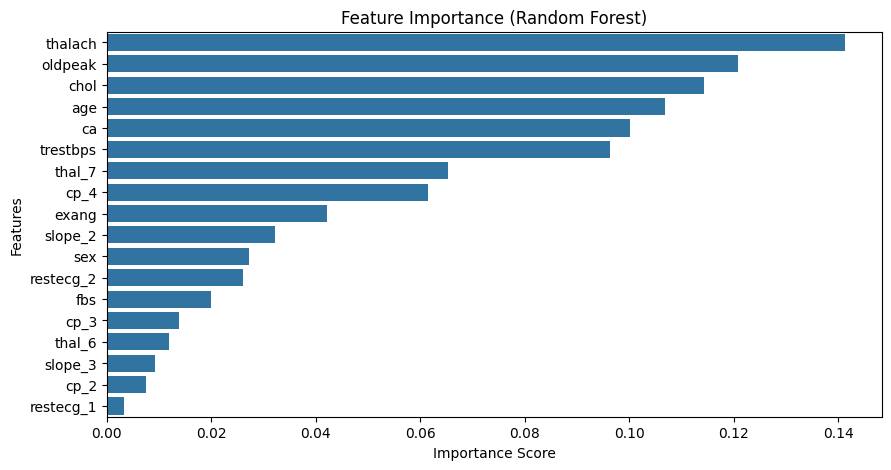

In [21]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Recursive Feature Elimination (RFE)**

Systematically selects the best predictors

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic Regression + RFE
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)  # choose top 10 features
rfe.fit(X, y)

# Show selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['sex', 'fbs', 'exang', 'oldpeak', 'ca', 'cp_4', 'restecg_2', 'slope_2',
       'thal_6', 'thal_7'],
      dtype='object')


**Chi-Square Test (for categorical vs target)**

In [23]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# scale to non-negative values for chi2
X_scaled = MinMaxScaler().fit_transform(X)
chi_scores, p_values = chi2(X_scaled, y)

chi_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

print(chi_results)

      Feature  Chi2 Score       p-value
17     thal_7   46.721875  1.742480e-09
11       cp_4   45.129615  3.736737e-09
6       exang   41.534482  2.083076e-08
8          ca   36.622292  2.154659e-07
14    slope_2   22.408432  1.661808e-04
10       cp_3   21.974965  2.027333e-04
9        cp_2   16.942450  1.983352e-03
7     oldpeak   16.451213  2.469786e-03
16     thal_6   10.943440  2.720708e-02
1         sex    7.499223  1.117436e-01
4         fbs    6.658223  1.550901e-01
12  restecg_1    6.557266  1.612178e-01
13  restecg_2    6.458947  1.673955e-01
15    slope_3    5.528483  2.372371e-01
5     thalach    3.133976  5.356604e-01
0         age    1.244886  8.706545e-01
2    trestbps    0.622014  9.605862e-01
3        chol    0.175931  9.963506e-01


In [24]:
X_selected = X[selected_features]  # from RFE or combined
final_df = X_selected.copy()
final_df["target"] = y

final_df.to_csv("heart_disease_selected.csv", index=False)

# **5) Supervised Learning - Classification Models + Hyperparameter Tuning**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, classification_report
)
import matplotlib.pyplot as plt

In [26]:
# Assuming df_selected is your reduced dataset after feature selection
# and 'target' is the name of your label column

df_selected = final_df

X = df_selected.drop("target", axis=1)
y = df_selected["target"]

In [27]:
# 1. Split dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# 2. Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

In [29]:
results = {}
y_pred_probs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Save predictions
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
    }

    # ROC requires probability scores
    y_pred_probs[name] = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# 3. Metrics Table
results_df = pd.DataFrame(results).T
print("Performance Metrics:\n")
print(results_df)

Performance Metrics:

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.590164   0.521604  0.590164  0.541148
Decision Tree        0.409836   0.419609  0.409836  0.414523
Random Forest        0.540984   0.528846  0.540984  0.534426
SVM                  0.590164   0.513726  0.590164  0.539278


In [31]:
# 4. Classification Reports
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        33
           1       0.40      0.18      0.25        11
           2       0.12      0.14      0.13         7
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.59        61
   macro avg       0.30      0.29      0.28        61
weighted avg       0.52      0.59      0.54        61


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        33
           1       0.08      0.09      0.08        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.41        61
   macro avg       0.17      0.16      0.16      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


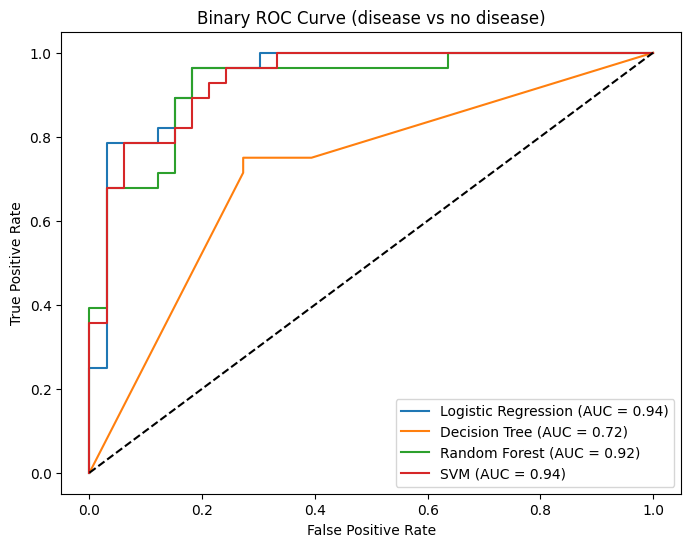

In [32]:
# convert to binary: 0 = no disease, 1 = disease (1-4 -> 1)
y_test_bin = (y_test > 0).astype(int)

plt.figure(figsize=(8,6))
for name, model in models.items():
    # get binary probability for "disease" class
    probs = model.predict_proba(X_test)  # shape (n_samples, n_classes)
    # If the model gives multi-class probs, sum probs for classes >0
    if probs.shape[1] == 2:
        pos_prob = probs[:,1]
    else:
        # classes are e.g. [0,1,2,3,4]; probability of disease = 1 - P(class 0)
        pos_prob = 1 - probs[:, 0]
        # alternatively: pos_prob = probs[:,1:].sum(axis=1)

    fpr, tpr, _ = roc_curve(y_test_bin, pos_prob)
    auc = roc_auc_score(y_test_bin, pos_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Binary ROC Curve (disease vs no disease)")
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Decision Tree
dt_params = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Random Forest
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# SVM
svm_params = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto"],
    "kernel": ["linear", "rbf"]
}

# Logistic Regression
log_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

In [34]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Random Forest GridSearch ---
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF score:", grid_rf.best_score_)

# --- Logistic Regression GridSearch ---
grid_log = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=log_params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
grid_log.fit(X_train, y_train)
print("\nBest Logistic Regression params:", grid_log.best_params_)
print("Best Logistic Regression CV score:", grid_log.best_score_)

# --- Decision Tree GridSearch ---
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
grid_dt.fit(X_train, y_train)
print("\nBest Decision Tree params:", grid_dt.best_params_)
print("Best Decision Tree CV score:", grid_dt.best_score_)

# --- SVM GridSearch ---
grid_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=svm_params,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)
print("\nBest SVM params:", grid_svm.best_params_)
print("Best SVM CV score:", grid_svm.best_score_)

Best RF params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best RF score: 0.5948979591836735

Best Logistic Regression params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression CV score: 0.5739795918367347

Best Decision Tree params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree CV score: 0.5615646258503402

Best SVM params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM CV score: 0.574234693877551


In [35]:
results = {
    "Logistic Regression": grid_log.best_score_,
    "Decision Tree": grid_dt.best_score_,
    "Random Forest": grid_rf.best_score_,
    "SVM": grid_svm.best_score_
}

results_df = pd.DataFrame(list(results.items()), columns=["Model", "CV Accuracy"])
print(results_df)

                 Model  CV Accuracy
0  Logistic Regression     0.573980
1        Decision Tree     0.561565
2        Random Forest     0.594898
3                  SVM     0.574235


# **6) Unsupervised Learning - Clustering Models**

**K-Means Clustering**

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

*Using the elbow method to choose the best number of clusters k*

In [37]:
# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

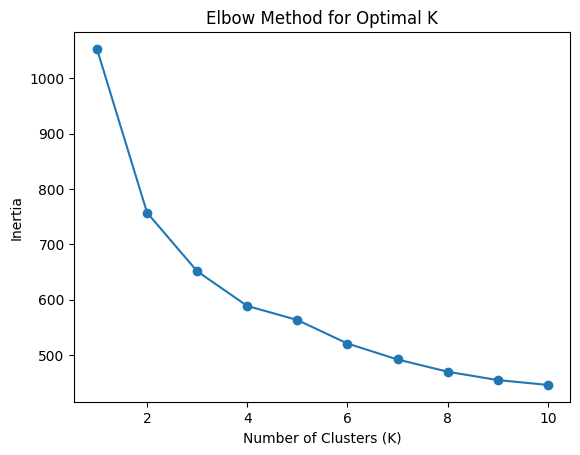

In [38]:
plt.plot(K_range, inertia, 'o-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [39]:
# Fit KMeans with chosen K (e.g. 2, since disease/no disease is binary)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Evaluate clustering
print("Silhouette Score:", silhouette_score(X, y_kmeans))
print("Adjusted Rand Index:", adjusted_rand_score(y, y_kmeans))

Silhouette Score: 0.29960786928792793
Adjusted Rand Index: 0.363157543688398


**Hierarchical Clustering**

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X, method='ward')

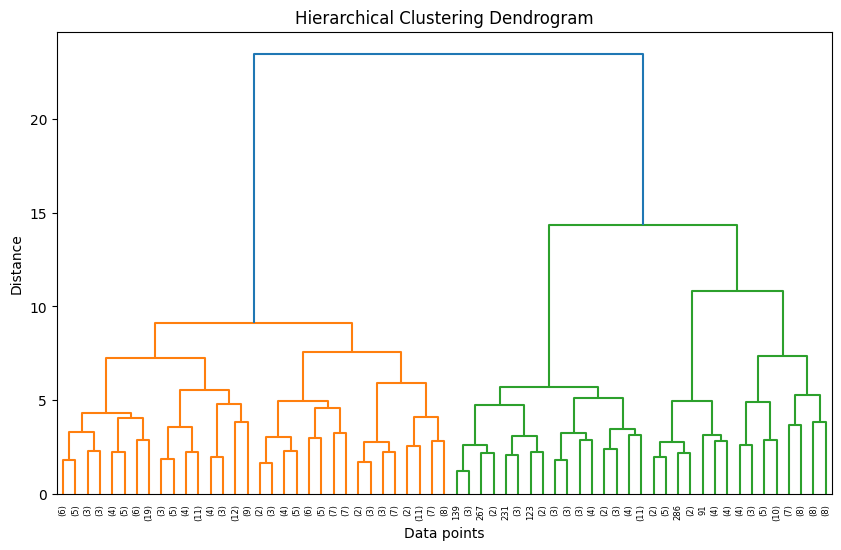

In [42]:
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [43]:
# Cut dendrogram into 2 clusters
y_hier = fcluster(Z, 2, criterion="maxclust")

print("Adjusted Rand Index (Hierarchical):", adjusted_rand_score(y, y_hier))

Adjusted Rand Index (Hierarchical): 0.29811096325588693


# **7) Model Export & Deployment**

In [60]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example pipeline: scaler + logistic regression (replace with your best model)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", grid_rf.best_estimator_)
])

# Fit pipeline on full dataset (train + test)
pipeline.fit(X, y)

# Save pipeline
joblib.dump(pipeline, "heart_disease_pipeline.pkl")
print("Pipeline saved as heart_disease_pipeline.pkl")

Pipeline saved as heart_disease_pipeline.pkl


**Load the model**

In [46]:
# Load
loaded_model = joblib.load("heart_disease_pipeline.pkl")

# Predict
sample = X.iloc[0:5]  # example patients
preds = loaded_model.predict(sample)
print(preds)

[0 1 3 0 0]
